Iterations ENKF <class 'model1_class.Model1'>:  19%|█▊        | 74/396 [00:00<00:00, 363.26it/s]c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\agent1_class.py:58: RuntimeWarning: divide by zero encountered in scalar divide
  self.g_rate = (self.wealth_list[-1] / self.wealth_list[-2]) - 1
Iterations ENKF <class 'model1_class.Model1'>:  38%|███▊      | 149/396 [00:00<00:00, 352.98it/s]c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\agent1_class.py:58: RuntimeWarning: invalid value encountered in scalar divide
  self.g_rate = (self.wealth_list[-1] / self.wealth_list[-2]) - 1
Iterations ENKF <class 'model2_class.Model2'>: 100%|██████████| 396/396 [00:01<00:00, 358.54it/s]
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:308: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '

This is the wealth groups data [[0.07693372279782379, 0.3498467632714688, 0.35036022794049193, 0.3527155791600168, 0.35893342847824916, 0.3604230639000772, 0.36330012969409897, 0.3678443643064326, 0.3701940152793509, 0.3753965309704313, 0.37288735731373107, 0.3710991770641789, 0.3710720695961603, 0.3715567336516014, 0.36895157015554986, 0.37872221214570845, 0.3799829232274501, 0.38347419385699716, 0.3877892665983696, 0.3869265408570887, 0.37792278956941255, 0.37644518368810453, 0.3772623387014425, 0.3786345810288294, 0.3786504815892368, 0.37879798752536203, 0.37903712685390223, 0.3798914848210904, 0.3803314707343743, 0.3802987710647648, 0.38149175958033016, 0.3821366457821907, 0.38373304937899483, 0.3847953839552856, 0.3844695889819078, 0.3856084415784972, 0.3868327197320929, 0.38796011508634765, 0.388586686631537, 0.3890197451217811, 0.39042674566142105, 0.39251167297175227, 0.3956904686716573, 0.39573587495174894, 0.3962467621618842, 0.3969793253830908, 0.3982429303764958, 0.39970645

C:\Users\yoswald\AppData\Local\Temp\ipykernel_19656\3751743005.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
C:\Users\yoswald\AppData\Local\Temp\ipykernel_19656\3751743005.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
C:\Users\yoswald\AppData\Local\Temp\ipykernel_19656\3751743005.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
C:\Users\yoswald\AppData\Local\Temp\ipykernel_19656\3751743005.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

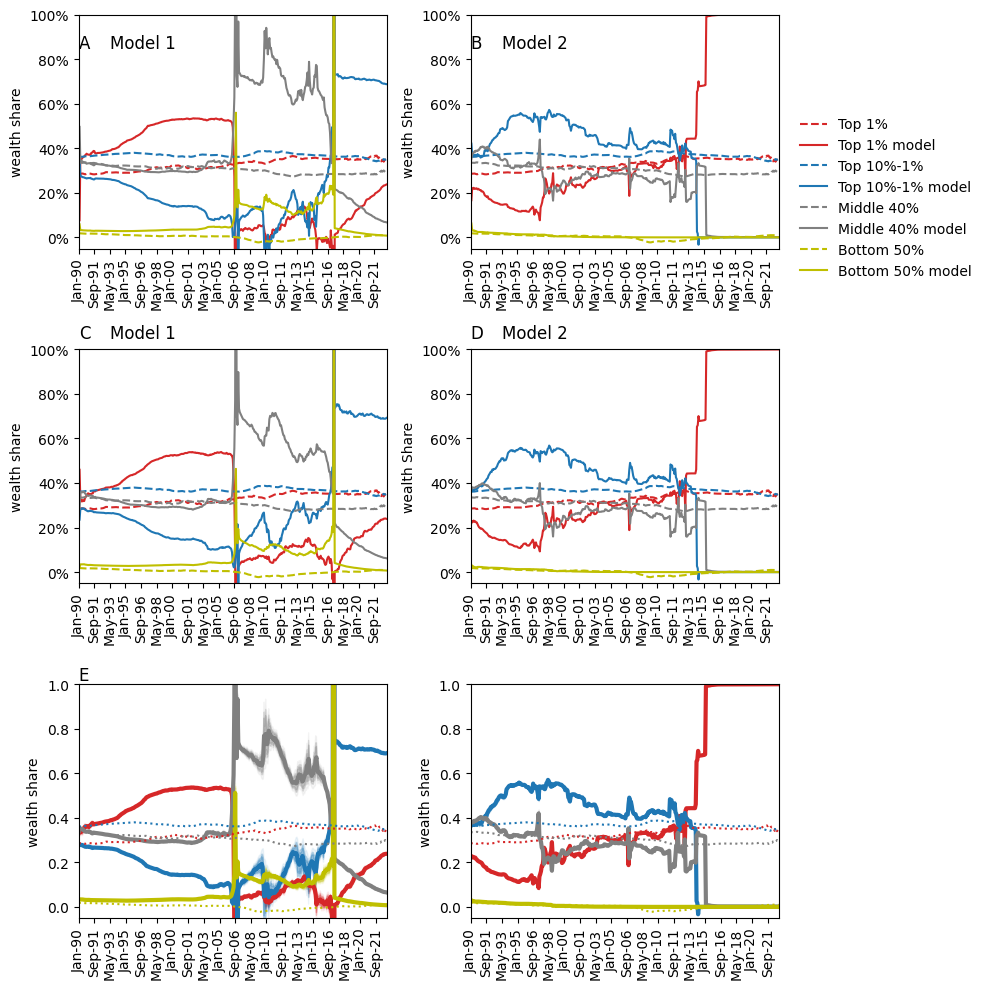

In [13]:
#General packages
import os
import numpy as np
from tqdm import tqdm  ### package for progress bars
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
### MODEL 1 infrastructure
import pandas as pd
from model1_class import Model1
from run_enkf import *
### MODEL 2 infrastructure
from model2_class import Model2
#from run_both_models_n_times_and_compute_error import *
import import_ipynb
import matplotlib.ticker as mtick
tqdm.pandas()

#%%


class Experiment1:
    def __init__(self, num_agents, ensemble_size, macro_state_dim, start_year, end_year, filter_freq):
        self.num_agents = num_agents
        self.ensemble_size = ensemble_size
        self.macro_state_dim = macro_state_dim
        self.enkf1 = None
        self.enkf2 = None
        self.start_year = start_year
        self.end_year = end_year

    def run_both_enkf(self, filter_freq):
        
        model_params1 = {"population_size": self.num_agents,
                        "growth_rate": 0.025,
                        "b_begin": 1.3,
                        "distribution": "exponential_pareto", # either "Pareto_lognormal" or "exponential_pareto"
                        "start_year": self.start_year,
                        "uncertainty_para": 0.1}
        
        model_params2 = {"population_size": self.num_agents, 
                        "concavity": 1,
                        "growth_rate": 0.025, 
                        "distribution": "exponential_pareto", # either "Pareto_lognormal" or "exponential_pareto"
                        "start_year": self.start_year,
                        "adaptive_sensitivity": 0.02,
                        "uncertainty_para": 0}

        
        self.enkf1 = prepare_enkf(Model1,
                                  model_params= model_params1,
                                  ensemble_size = self.ensemble_size,
                                  macro_state_dim = self.macro_state_dim,
                                  filter_freq = filter_freq,
                                  uncertainty_obs = 0.5)
        
        self.enkf2 = prepare_enkf(Model2,
                                   model_params= model_params2,
                                  ensemble_size = self.ensemble_size,
                                  macro_state_dim = self.macro_state_dim,
                                  filter_freq = filter_freq,
                                  uncertainty_obs = 0.5)
        
        run_enkf(self.enkf1, start_year=self.start_year, end_year=self.end_year, filter_freq = filter_freq)
        run_enkf(self.enkf2, start_year=self.start_year, end_year=self.end_year, filter_freq = filter_freq)

    def plot_results(self):

        fig = plt.figure(figsize=(10, 10))
        # Create a gridspec object
        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
        # Create individual subplots
        ax0 = plt.subplot(gs[0, 0])
        ax1 = plt.subplot(gs[0, 1])
        ax2 = plt.subplot(gs[1, 0])
        ax3 = plt.subplot(gs[1, 1])
        ax4 = plt.subplot(gs[2, 0])
        ax5 = plt.subplot(gs[2, 1])
        # ax4 = plt.subplot(gs[2, :])  # This one spans both columns

        self.enkf1.models[0].plot_wealth_groups_over_time(ax0, self.start_year, self.end_year)
        self.enkf2.models[0].plot_wealth_groups_over_time(ax1, self.start_year, self.end_year)

        self.enkf1.models[1].plot_wealth_groups_over_time(ax2, self.start_year, self.end_year)
        self.enkf2.models[1].plot_wealth_groups_over_time(ax3, self.start_year, self.end_year)

        self.enkf1.plot_fanchart(ax4)
        self.enkf2.plot_fanchart(ax5)        
        #self.enkf1.plot_error(ax4)
        #self.enkf2.plot_error(ax4)

        ###EXTRAS
        #AX0
        ax0.text(0, 0.85, 'A', fontsize = 12)
        ax0.text(40, 0.85, 'Model 1', fontsize = 12)
        ax0.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
        #AX1
        ax1.legend(loc=(1.05, -0.15), frameon = False) ### legend only here
        ax1.text(0, 0.85, 'B', fontsize = 12)
        ax1.text(40, 0.85, 'Model 2', fontsize = 12)
        ax1.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
        #AX2
        ax2.text(0, 1.05, 'C', fontsize = 12)
        ax2.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
        ax2.text(40,1.05, 'Model 1', fontsize = 12)
        #AX3
        ax3.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
        ax3.text(0,1.05, 'D', fontsize = 12)
        ax3.text(40,1.05, 'Model 2', fontsize = 12)

        path = '..'
        with open(os.path.join(path, 'data', 'mean_errors.csv')) as f:
            errors_df_no_enkf = pd.read_csv(f, encoding='unicode_escape')

        #ax4.plot(errors_df_no_enkf['mean_error_model1'], linestyle='--', label='Model 1 no ENKF', color='tab:blue')
        #ax4.plot(errors_df_no_enkf['mean_error_model2'], linestyle='--', label='Model 2 no ENKF', color='tab:orange')
        #ax4.legend(bbox_to_anchor=(1.05, 1), frameon=False)
        
        # Get the limits
        x_min, x_max = ax4.get_xlim()
        y_min, y_max = ax4.get_ylim()
        ax4.text(0, y_max+0.02, 'E', fontsize = 12)
        ax4.margins(0)


        plt.tight_layout()
        plt.savefig('fig4.png', dpi=300)
        plt.show()
         
        
# Example usage
if __name__ == "__main__":
    filter_freq = 1
    experiment1 = Experiment1(num_agents=100, 
                              ensemble_size=2, 
                              macro_state_dim=4, # needs to be set to 3 for the model to work if num_agents < 100
                              start_year=1990,
                              end_year=2022,
                              filter_freq = filter_freq)
    experiment1.run_both_enkf(filter_freq = filter_freq)
    experiment1.plot_results()
    agent_states_model1 = experiment1.enkf1.micro_history
    agent_states_model2 = experiment1.enkf2.micro_history



## Analysis of numerical instability and filter behaviour during update step

In [14]:
test = experiment1.enkf1.models[0].macro_state_vectors
test2 = experiment1.enkf1.models[0].micro_state_vectors[0]
print(experiment1.enkf1.models[1].macro_state)
print(experiment1.enkf1.models[0].micro_state)
print(experiment1.enkf1.models[1].micro_state)


test3 = experiment1.enkf1.macro_history_share
test4 = experiment1.enkf1.macro_history
test4 = [[ensemble[1:] for ensemble in wealth_group] for wealth_group in test4]

print(len(experiment1.enkf1.macro_history_share[0][0]))
print(len(experiment1.enkf1.macro_history[0][0]))

# Initialize an empty list to store data for the DataFrame
data = []

# Iterate over wealth groups and their respective ensemble members
for wealth_group_idx, (wealth_group_share, wealth_group_abs) in enumerate(zip(test3, test4)):
    for ensemble_idx, (ensemble_share, ensemble_abs) in enumerate(zip(wealth_group_share, wealth_group_abs)):
        for time_step_idx, (value_share, value_abs) in enumerate(zip(ensemble_share, ensemble_abs)):
            data.append([wealth_group_idx + 1, ensemble_idx + 1, time_step_idx + 1, value_share, value_abs])

# Create DataFrame
df = pd.DataFrame(data, columns=['Wealth Group', 'Ensemble Member', 'Time Step', 'Value', 'Abs_Value'])

# Save DataFrame to CSV
df.to_csv('output_enkf1.csv', index=False)



# Initialize an empty list to store the data
data = []

# Iterate over the time steps
for time_step in range(len(experiment1.enkf1.models[0].micro_state_vectors)):
    # Extract the micro state vector for the current time step
    micro_state_vector = experiment1.enkf1.models[0].micro_state_vectors[time_step]
    # Iterate over each element in the micro state vector
    for element in micro_state_vector:
        # Append a new row to the data list with the current time step and element
        data.append([time_step + 1, element[0]])

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['Time Step', 'Micro State Element'])

# Save the DataFrame to a CSV file
df.to_csv('micro_state_vectors_model1.csv', index=False)

'''
update_step_choice = 0

# MODEL 2 ENKF analysis
# get data ensemble, state ensemble, H, Kalman Gain

data_ensemble_history = experiment1.enkf2.data_ensemble_history
state_ensemble_history = experiment1.enkf2.state_ensemble_history	
H = experiment1.enkf2.H
Kalman_Gain_history = experiment1.enkf2.Kalman_Gain_history 
diff_history  = experiment1.enkf2.diff_history 
print(data_ensemble_history[update_step_choice].shape)
print(state_ensemble_history[update_step_choice].shape)
print(H.shape)
print(Kalman_Gain_history[update_step_choice].shape)
print(diff_history[update_step_choice].shape)

# print first element data ensemble and state ensemble and Kalman Gain
print('this data ensemble history model 2', data_ensemble_history[update_step_choice])
print('this is state ensemble history model 2', state_ensemble_history[update_step_choice])
print('this is Kalman Gain history model 2', Kalman_Gain_history[update_step_choice])
print('this is diff history model 2', diff_history[update_step_choice])

# analyse variance of data ensemble
variance_data_ensemble = np.var(data_ensemble_history[update_step_choice], axis = 1)
print('this is variance of data ensemble model 2', variance_data_ensemble)
'''

agent_state_history_model_2 = experiment1.enkf2.micro_history
wealth_group_state_history_model_2 = experiment1.enkf2.macro_history
wealth_group_state_history_model_2_one_group = wealth_group_state_history_model_2[0]

agent_state_history_model_1 = experiment1.enkf1.micro_history


# create dataframe for agent state history model 2 whic

# loop over elements of agent state history model 2 and store as time steps in pandas dataframe
for i in range(len(agent_state_history_model_2)):
    agent_state_history_model_2[i] = pd.DataFrame(agent_state_history_model_2[i])
    agent_state_history_model_2[i]['time_step'] = i


#print('this the model ensemble of agent state history of one time step', agent_state_history_model_2[0])
#print('this is the shape of agent state history of one time step', agent_state_history_model_2[0].shape)

# test whether agent_state_history_model_2[0] is the exactly same as agent_state_history_model_2[1]
#print('this is the difference between agent state history of two time steps', agent_state_history_model_2[0] - agent_state_history_model_2[1])

# MODEL 1 ENKF analysis
# get data ensemble, state ensemble, H, Kalman Gain

'''
data_ensemble_historyMODEL1 = experiment1.enkf1.data_ensemble_history
state_ensemble_historyMODEL1= experiment1.enkf1.state_ensemble_history	
H = experiment1.enkf1.H
Kalman_Gain_historyMODEL1 = experiment1.enkf1.Kalman_Gain_history 
diff_historyMODEL1  = experiment1.enkf1.diff_history
print(data_ensemble_historyMODEL1[update_step_choice].shape)
print(state_ensemble_historyMODEL1[update_step_choice].shape)
print(H.shape)
print(Kalman_Gain_historyMODEL1[update_step_choice].shape)


# print first element data ensemble and state ensemble and Kalman Gain
print('this data ensemble history model 1', data_ensemble_historyMODEL1[update_step_choice])
print('this is state ensemble history model 1', state_ensemble_historyMODEL1[update_step_choice])
print('this is Kalman Gain history model 1', Kalman_Gain_historyMODEL1[update_step_choice])
print('this is diff history model 1', diff_historyMODEL1[update_step_choice])

# analyse variance of data ensemble
variance_data_ensemble = np.var(data_ensemble_historyMODEL1[update_step_choice], axis = 1)
print('this is variance of data ensemble model 1', variance_data_ensemble)
'''





[4.53947778e+06 1.46424758e+06 2.93774408e+04 2.69052291e+03]
[4.04322519e+06 2.95636300e+06 2.96166813e+06 1.97314820e+06
 1.77316449e+06 1.35355335e+06 3.85319425e+05 8.94609385e+04
 8.84634536e+04 1.07741446e+05 9.06428074e+04 8.79066035e+04
 8.30609042e+04 3.14339567e+04 5.73543145e+04 2.11376503e+04
 8.96992855e+04 5.51383557e+04 3.39809437e+04 3.58509406e+04
 7.53119781e+04 7.57135717e+03 2.99021706e+04 2.23658038e+04
 1.45705056e+03 1.70518728e+04 6.32290608e+03 1.27853604e+03
 7.18287208e+04 2.09852787e+04 5.60951051e+03 3.11872492e+04
 1.21245710e+04 1.35735728e+03 3.93064981e+03 1.41209592e+04
 2.80919007e+04 1.09260089e+04 1.03189383e+04 1.59959945e+04
 3.53291886e+03 3.13609864e+04 9.39652766e+02 9.09669775e+03
 2.99316163e+03 2.34118567e+04 3.32488045e+02 5.71846448e+04
 3.21035215e+04 5.11071710e+03 0.00000000e+00 1.01519727e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.27392873e+03
 0.00000000e+00 0.00000

"\ndata_ensemble_historyMODEL1 = experiment1.enkf1.data_ensemble_history\nstate_ensemble_historyMODEL1= experiment1.enkf1.state_ensemble_history\t\nH = experiment1.enkf1.H\nKalman_Gain_historyMODEL1 = experiment1.enkf1.Kalman_Gain_history \ndiff_historyMODEL1  = experiment1.enkf1.diff_history\nprint(data_ensemble_historyMODEL1[update_step_choice].shape)\nprint(state_ensemble_historyMODEL1[update_step_choice].shape)\nprint(H.shape)\nprint(Kalman_Gain_historyMODEL1[update_step_choice].shape)\n\n\n# print first element data ensemble and state ensemble and Kalman Gain\nprint('this data ensemble history model 1', data_ensemble_historyMODEL1[update_step_choice])\nprint('this is state ensemble history model 1', state_ensemble_historyMODEL1[update_step_choice])\nprint('this is Kalman Gain history model 1', Kalman_Gain_historyMODEL1[update_step_choice])\nprint('this is diff history model 1', diff_historyMODEL1[update_step_choice])\n\n# analyse variance of data ensemble\nvariance_data_ensemble =

## Plot agent-state variables and how the ENKF affects them

### Collect data from model 1

In [15]:
# Initialize an empty list to store the data
data = []
# Iterate over each array in the micro_history
for time_step, array in enumerate(agent_states_model1):
    # Create a DataFrame from the array
    df = pd.DataFrame(array)
    
    # Add the time_step column
    df['time_step'] = time_step + 1
    
    print(df.head())
    # Append the DataFrame to the list
    data.append(df)

# Concatenate the list into a single DataFrame
result_df = pd.concat(data, ignore_index=True)

# Optionally, rename the columns to be more descriptive
result_df.columns = [f'ensemble_member_{i}' for i in range(result_df.shape[1] - 1)] + ['time_step']

print(result_df.head())


             0            1  time_step
0   499.066115  1894.256921          1
1   946.849005  2238.239844          1
2  1109.284109  1887.763473          1
3  1712.139197  2274.981994          1
4  1905.352785  1781.515582          1
              0             1  time_step
0  7.349184e+06  6.626945e+06          2
1  8.548068e+05  8.524590e+05          2
2  7.954184e+05  7.847793e+05          2
3  7.522272e+05  7.451793e+05          2
4  6.660586e+05  6.636486e+05          2
              0             1  time_step
0  7.381582e+06  6.556687e+06          3
1  8.563746e+05  8.554708e+05          3
2  7.958261e+05  7.852446e+05          3
3  7.520327e+05  7.570821e+05          3
4  6.680193e+05  6.648783e+05          3
              0             1  time_step
0  7.459051e+06  6.380493e+06          4
1  8.563983e+05  8.559006e+05          4
2  7.952331e+05  8.076870e+05          4
3  7.529628e+05  7.592377e+05          4
4  6.685386e+05  6.640842e+05          4
              0             

### Collect data from model 2

In [16]:
# Initialize an empty list to store the data
data_model2 = []

# Iterate over each array in the micro_history
for time_step, array in enumerate(agent_states_model2):
    # Create a DataFrame from the array
    df = pd.DataFrame(array)
    
    # Add the time_step column
    df['time_step'] = time_step + 1
    
    print(df.head())
    # Append the DataFrame to the list
    data_model2.append(df)

# Concatenate the list into a single DataFrame
result_df_model2 = pd.concat(data_model2, ignore_index=True)

# Optionally, rename the columns to be more descriptive
result_df_model2.columns = [f'ensemble_member_{i}' for i in range(result_df_model2.shape[1] - 1)] + ['time_step']

print(result_df_model2.head())


               0              1  time_step
0  100906.560690  419913.490277          1
1    5829.045261   10953.522912          1
2     340.683986    3071.634907          1
3   41183.158498   58971.107607          1
4  220956.983528  794867.311084          1
              0             1  time_step
0  3.612172e+06  3.548530e+06          2
1  8.303457e+05  5.529204e+05          2
2  8.706921e+05  7.957387e+05          2
3  7.165028e+05  6.734649e+05          2
4  7.974832e+05  7.885165e+05          2
              0             1  time_step
0  3.648263e+06  3.633247e+06          3
1  8.079264e+05  6.235645e+05          3
2  9.596015e+05  9.177042e+05          3
3  7.133352e+05  6.768328e+05          3
4  8.099151e+05  7.877119e+05          3
              0             1  time_step
0  3.726869e+06  3.748859e+06          4
1  7.561773e+05  6.242110e+05          4
2  9.329776e+05  9.033413e+05          4
3  6.970179e+05  6.610545e+05          4
4  7.821489e+05  7.812953e+05          4
    

## Try plotting average of ensembles evolution

c:\Users\yoswald\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yoswald\AppData\Local\Temp\ipykernel_19656\3828414789.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_avg['log_wealth'] = np.log(result_df_avg['average_wealth'])
c:\Users\yoswald\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yoswald\AppData\Local\Temp\ipykernel_19656\3828414789.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Text(0.5, 1.0, 'Model 2')

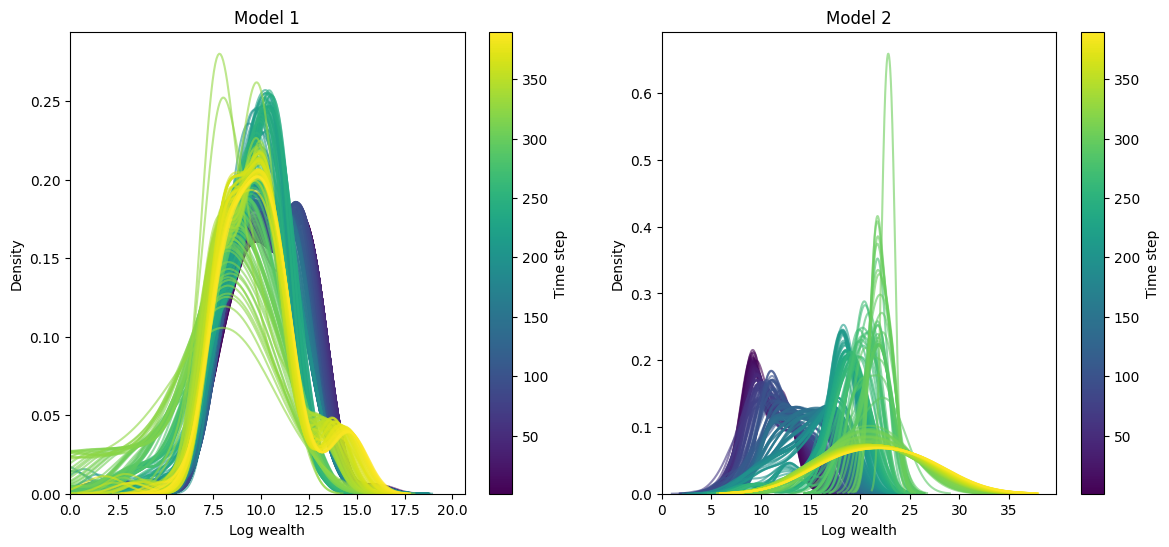

In [17]:

# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# build average of all ensemble members
result_df['average_wealth'] = result_df.iloc[:, 1:-1].mean(axis=1)
result_df_avg = result_df[['time_step', 'average_wealth']]

# log transform the average data
result_df_avg['log_wealth'] = np.log(result_df_avg['average_wealth'])

# loop over time steps and plot all data as kernel density estimates with a colormap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=1, vmax=390)

for time_step in range(1, 390):
    color = cmap(norm(time_step))
    sns.kdeplot(result_df_avg[result_df_avg['time_step'] == time_step]['log_wealth'], ax=ax1, color=color, label=f'Time step {time_step}', alpha=0.6)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1)
cbar.set_label('Time step')
ax1.set_xlabel('Log wealth')
ax1.set_ylabel('Density')
# set left x axis limit at 0
ax1.set_xlim(left=0)
ax1.set_title('Model 1')


## Model 2
# build average of all ensemble members
result_df_model2['average_wealth'] = result_df_model2.iloc[:, 1:-1].mean(axis=1)
result_df_avg_model2 = result_df_model2[['time_step', 'average_wealth']]
# log transform the average data
result_df_avg_model2['log_wealth'] = np.log(result_df_avg_model2['average_wealth'])

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=1, vmax=390)
for time_step in range(1, 390):
    color = cmap(norm(time_step))
    sns.kdeplot(result_df_avg_model2[result_df_avg_model2['time_step'] == time_step]['log_wealth'], ax=ax2, color=color, label=f'Time step {time_step}', alpha=0.6)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax2)
cbar.set_label('Time step')
ax2.set_xlabel('Log wealth')
ax2.set_ylabel('Density')
# set left x axis limit at 0
ax2.set_xlim(left=0)
ax2.set_title('Model 2')

## Plot first update state average across ensemble members vs. observations as well

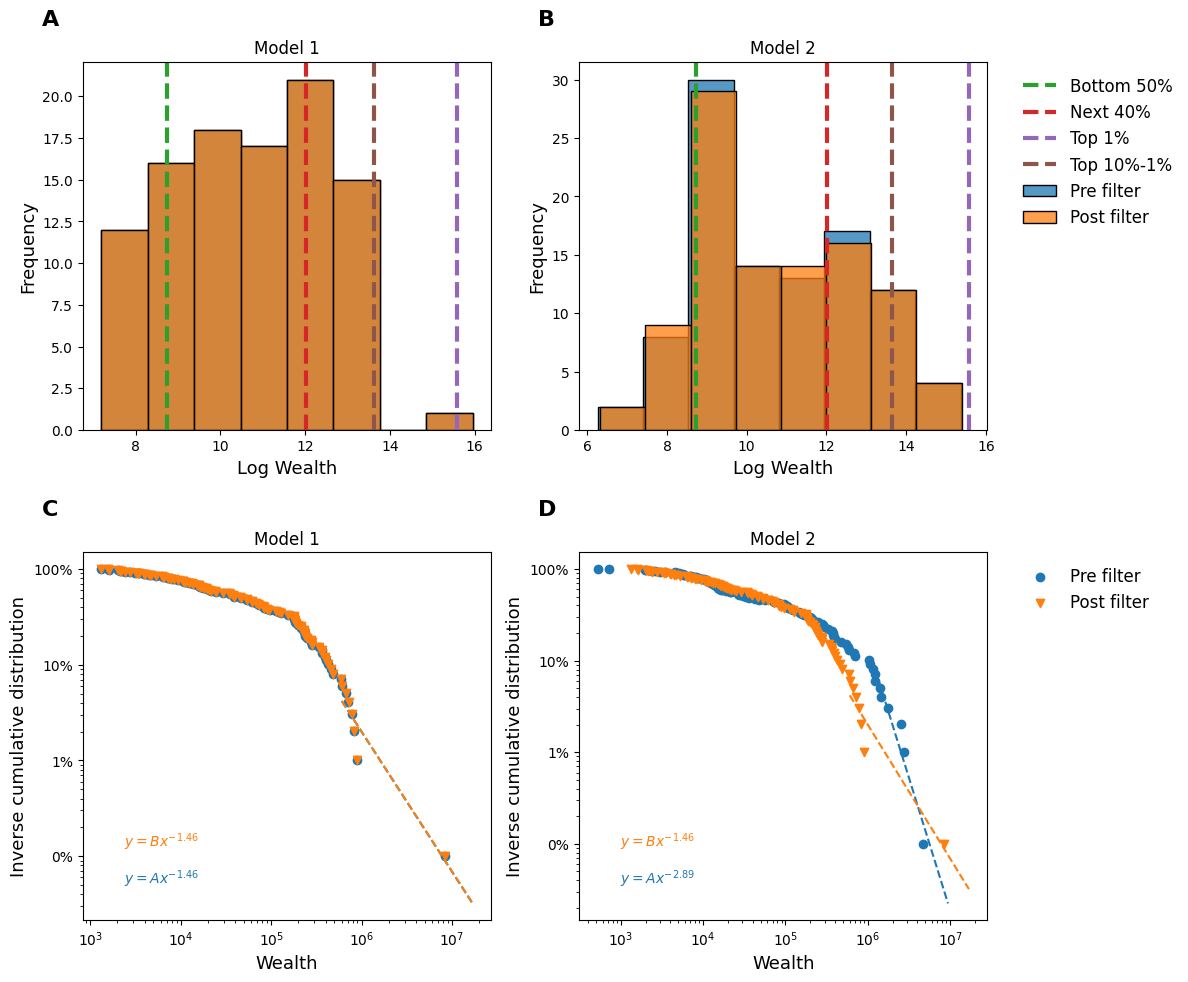

In [18]:
# Load the empirical data
path = '..'
with open(os.path.join(path, 'data', 'wealth_data_for_import.csv')) as f:
    wealth_data = pd.read_csv(f, encoding='unicode_escape')


# Plot time step 20 and 40 kernel density estimates of the log values
# Plot kernel density estimates and empirical data in a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# First model KDE plots
sns.histplot(result_df_avg[result_df_avg['time_step'] == 30]['log_wealth'], ax=ax1, label='Time step 31: Pre filter', color='tab:blue')
sns.histplot(result_df_avg[result_df_avg['time_step'] == 31]['log_wealth'], ax=ax1, label='Time step 32: Post filter', color='tab:orange')

# Subset the data to the years 1990-2022
wealth_data = wealth_data[(wealth_data['year'] >= 1990) & (wealth_data['year'] <= 2022)]
# Subset wealth data based on column year being 1992 and month column being 7
wealth_data_empirical = wealth_data[(wealth_data['year'] == 1992) & (wealth_data['month'] == 7)]
# Subset the column real_wealth_per_unit only and log transform the data
wealth_data_empirical_log = np.log(wealth_data_empirical['real_wealth_per_unit'])

# Plot vertical lines for the empirical data
empirical_labels = ['Bottom 50%', 'Next 40%', 'Top 1%', 'Top 10%-1%']
empirical_colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for i, (value, label, color) in enumerate(zip(wealth_data_empirical_log, empirical_labels, empirical_colors)):
    ax1.axvline(value, color=color, linestyle='--', linewidth=3, label=label)
    ax2.axvline(value, color=color, linestyle='--', linewidth=3, label=label)

# Second model KDE plots
sns.histplot(result_df_avg_model2[result_df_avg_model2['time_step'] == 30]['log_wealth'], ax=ax2, label='Pre filter', color='tab:blue')
sns.histplot(result_df_avg_model2[result_df_avg_model2['time_step'] == 31]['log_wealth'], ax=ax2, label='Post filter', color='tab:orange')

# Adjust layout to fit legends outside the plots
fig.tight_layout(rect=[0, 0, 0.85, 1])

fontsize_axislabels = 13

# Place the legend outside the second subplot
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12, frameon=False)

# Set titles and labels
ax1.set_title('Model 1')
ax1.set_xlabel('Log Wealth', fontsize=fontsize_axislabels)
ax1.set_ylabel('Frequency', fontsize=fontsize_axislabels)

ax2.set_title('Model 2')
ax2.set_xlabel('Log Wealth', fontsize=fontsize_axislabels)
ax2.set_ylabel('Frequency', fontsize=fontsize_axislabels)

ax3.set_title('Model 1')
ax4.set_title('Model 2')

# Plot the non log wealth as inverse cumulative distribution
values_model1_pre_update = np.sort(result_df_avg[result_df_avg['time_step'] == 30]['average_wealth'])
values_model1_post_update = np.sort(result_df_avg[result_df_avg['time_step'] == 31]['average_wealth'])
# make cumulative percentiles of values
percentiles = np.linspace(0, 100, len(values_model1_pre_update))/100
# plot the percentiles
inv_cumulative = 1-percentiles
# last value add tiny positive value to avoid log(0)
inv_cumulative[-1] = inv_cumulative[-1] + 1e-3
# plot the percentiles
ax3.scatter(values_model1_pre_update, inv_cumulative, label='Pre filter', color='tab:blue')
ax3.scatter(values_model1_post_update, inv_cumulative, label='Post filter', color='tab:orange', marker = "v")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('Wealth', fontsize=fontsize_axislabels)
ax3.set_ylabel('Inverse cumulative distribution', fontsize=fontsize_axislabels)
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))



# Plot the non log wealth as inverse cumulative distribution
values_model2_pre_update = np.sort(result_df_avg_model2[result_df_avg_model2['time_step'] == 30]['average_wealth'])
values_model2_post_update = np.sort(result_df_avg[result_df_avg['time_step'] == 31]['average_wealth'])
# make cumulative percentiles of values
percentiles = np.linspace(0, 100, len(values_model2_pre_update))/100

ax4.scatter(values_model2_pre_update, inv_cumulative, label='Pre filter', color='tab:blue')
ax4.scatter(values_model2_post_update, inv_cumulative, label='Post filter', color='tab:orange', marker = "v")
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('Wealth', fontsize=fontsize_axislabels)
ax4.set_ylabel('Inverse cumulative distribution', fontsize=fontsize_axislabels)
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, frameon=False)


# Label the panels
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes, size=16, weight='bold')
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes, size=16, weight='bold')
ax3.text(-0.1, 1.1, 'C', transform=ax3.transAxes, size=16, weight='bold')
ax4.text(-0.1, 1.1, 'D', transform=ax4.transAxes, size=16, weight='bold')




# make the power law fits for panel 1 and panel 2 
last7 = values_model1_pre_update[-7:]
# last 7 percentiles
inv_cumulative_last7 = inv_cumulative[-7:]
# make linear fit of last7 as x and percentiles_last7 as y
slope, intercept = np.polyfit(np.log(last7), np.log(inv_cumulative_last7), 1)
# make power law fit with the slope and intercept
# Create dummy data using the min of last7 and max of last7 times 2
x_dummy = np.linspace(min(last7), max(last7) * 2, 100)
power_law = np.exp(slope*np.log(x_dummy) + intercept)
ax3.plot(x_dummy, power_law, label='Power law fit', color='tab:blue', linestyle='--')
# plot equation lower left corner of ax3
ax3.text(0.1, 0.1, f'$y = Ax^{{{slope:.2f}}}$', transform=ax3.transAxes, color='tab:blue')


# do fit for the  values_model1_post_update
last7 = values_model1_post_update[-7:]
# last 7 percentiles
inv_cumulative_last7 = inv_cumulative[-7:]
# make linear fit of last7 as x and percentiles_last7 as y
slope, intercept = np.polyfit(np.log(last7), np.log(inv_cumulative_last7), 1)
# make power law fit with the slope and intercept
x_dummy = np.linspace(min(last7), max(last7) * 2, 100)
power_law = np.exp(slope*np.log(x_dummy) + intercept)
ax3.plot(x_dummy, power_law, label='Power law fit', color='tab:orange', linestyle='--')
# plot equation lower left corner of ax3
ax3.text(0.1, 0.2, f'$y = Bx^{{{slope:.2f}}}$', transform=ax3.transAxes, color='tab:orange')

# do the fit for the model 2 values_model2_pre_update
last7 = values_model2_pre_update[-7:]
# last 7 percentiles
inv_cumulative_last7 = inv_cumulative[-7:]
# make linear fit of last7 as x and percentiles_last7 as y
slope, intercept = np.polyfit(np.log(last7), np.log(inv_cumulative_last7), 1)
# make power law fit with the slope and intercept
x_dummy = np.linspace(min(last7), max(last7) * 2, 100)
power_law = np.exp(slope*np.log(x_dummy) + intercept)
ax4.plot(x_dummy, power_law, label='Power law fit', color='tab:blue', linestyle='--')
# plot equation lower left corner of ax3
ax4.text(0.1, 0.1, f'$y = Ax^{{{slope:.2f}}}$', transform=ax4.transAxes, color='tab:blue')


# do fit for the  values_model2_post_update
last7 = values_model2_post_update[-7:]
# last 7 percentiles
inv_cumulative_last7 = inv_cumulative[-7:]
# make linear fit of last7 as x and percentiles_last7 as y
slope, intercept = np.polyfit(np.log(last7), np.log(inv_cumulative_last7), 1)
# make power law fit with the slope and intercept
x_dummy = np.linspace(min(last7), max(last7) * 2, 100)
power_law = np.exp(slope*np.log(x_dummy) + intercept)
ax4.plot(x_dummy, power_law, label='Power law fit', color='tab:orange', linestyle='--')
# plot equation lower left corner of ax4
ax4.text(0.1, 0.2, f'$y = Bx^{{{slope:.2f}}}$', transform=ax4.transAxes, color='tab:orange')

plt.tight_layout()

plt.savefig('fig5.png', dpi=300)

